In [2]:
import pandas as pd
import numpy as np
import json

In [3]:
def squad_json_to_dataframe_train(input_file_path, record_path = ['data','paragraphs','qas','answers'], verbose = 1):
    """
    input_file_path: path to the squad json file.
    record_path: path to deepest level in json file default value is
    ['data','paragraphs','qas','answers']
    verbose: 0 to suppress it default is 1
    """
    if verbose:
        print("Reading the json file")    
    file = json.loads(open(input_file_path).read())
    if verbose:
        print("processing...")
    # parsing different level's in the json file
    js = pd.io.json.json_normalize(file , record_path )
    m = pd.io.json.json_normalize(file, record_path[:-1] )
    r = pd.io.json.json_normalize(file,record_path[:-2])
    
    #combining it into single dataframe
    idx = np.repeat(r['context'].values, r.qas.str.len())
    ndx  = np.repeat(m['id'].values,m['answers'].str.len())
    m['context'] = idx
    js['q_idx'] = ndx
    main = pd.concat([ m[['id','question','context']].set_index('id'),js.set_index('q_idx')],1,sort=False).reset_index()
    main['c_id'] = main['context'].factorize()[0]
    if verbose:
        print("shape of the dataframe is {}".format(main.shape))
        print("Done")
    return main

In [4]:
def squad_json_to_dataframe_dev(input_file_path, record_path = ['data','paragraphs','qas','answers'],
                           verbose = 1):
    """
    input_file_path: path to the squad json file.
    record_path: path to deepest level in json file default value is
    ['data','paragraphs','qas','answers']
    verbose: 0 to suppress it default is 1
    """
    if verbose:
        print("Reading the json file")    
    file = json.loads(open(input_file_path).read())
    if verbose:
        print("processing...")
    # parsing different level's in the json file
    js = pd.io.json.json_normalize(file , record_path )
    m = pd.io.json.json_normalize(file, record_path[:-1] )
    r = pd.io.json.json_normalize(file,record_path[:-2])
    
    #combining it into single dataframe
    idx = np.repeat(r['context'].values, r.qas.str.len())
#     ndx  = np.repeat(m['id'].values,m['answers'].str.len())
    m['context'] = idx
#     js['q_idx'] = ndx
    main = m[['id','question','context','answers']].set_index('id').reset_index()
    main['c_id'] = main['context'].factorize()[0]
    if verbose:
        print("shape of the dataframe is {}".format(main.shape))
        print("Done")
    return main

In [5]:
input_file_path = '../datasets/SQuAD_train-v2.0.json'
record_path = ['data','paragraphs','qas','answers']
train = squad_json_to_dataframe_train(input_file_path=input_file_path,record_path=record_path)

Reading the json file
processing...


/home/sebastian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/home/sebastian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app
/home/sebastian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


shape of the dataframe is (130319, 6)
Done


In [7]:
# dev data
input_file_path = '../datasets/SQuAD_dev-v2.0.json'
record_path = ['data','paragraphs','qas','answers']
verbose = 0
dev = squad_json_to_dataframe_dev(input_file_path=input_file_path,record_path=record_path)

Reading the json file
processing...


/home/sebastian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app
/home/sebastian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()
/home/sebastian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


shape of the dataframe is (11873, 5)
Done


In [21]:
train

,index,question,context,text,answer_start,c_id
0,56be85543aeaaa14008c9063,When did Beyonce start becoming popular?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,in the late 1990s,269.0,0
1,56be85543aeaaa14008c9065,What areas did Beyonce compete in when she was...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,singing and dancing,207.0,0
2,56be85543aeaaa14008c9066,When did Beyonce leave Destiny's Child and bec...,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,2003,526.0,0
3,56bf6b0f3aeaaa14008c9601,In what city and state did Beyonce grow up?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,"Houston, Texas",166.0,0
4,56bf6b0f3aeaaa14008c9602,In which decade did Beyonce become famous?,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,late 1990s,276.0,0
...,...,...,...,...,...,...
130314,5a7e070b70df9f001a875439,Physics has broadly agreed on the definition o...,"The term ""matter"" is used throughout physics i...",NaN,NaN,19028
130315,5a7e070b70df9f001a87543a,Who coined the term partonic matter?,"The term ""matter"" is used throughout physics i...",NaN,NaN,19028
130316,5a7e070b70df9f001a87543b,What is another name for anti-matter?,"The term ""matter"" is used throughout physics i...",NaN,NaN,19028
130317,5a7e070b70df9f001a87543c,Matter usually does not need to be used in con...,"The term ""matter"" is used throughout physics i...",NaN,NaN,19028


In [22]:
dev

,id,question,context,answers,c_id
0,56ddde6b9a695914005b9628,In what country is Normandy located?,The Normans (Norman: Nourmands; French: Norman...,"[{'text': 'France', 'answer_start': 159}, {'te...",0
1,56ddde6b9a695914005b9629,When were the Normans in Normandy?,The Normans (Norman: Nourmands; French: Norman...,"[{'text': '10th and 11th centuries', 'answer_s...",0
2,56ddde6b9a695914005b962a,From which countries did the Norse originate?,The Normans (Norman: Nourmands; French: Norman...,"[{'text': 'Denmark, Iceland and Norway', 'answ...",0
3,56ddde6b9a695914005b962b,Who was the Norse leader?,The Normans (Norman: Nourmands; French: Norman...,"[{'text': 'Rollo', 'answer_start': 308}, {'tex...",0
4,56ddde6b9a695914005b962c,What century did the Normans first gain their ...,The Normans (Norman: Nourmands; French: Norman...,"[{'text': '10th century', 'answer_start': 671}...",0
...,...,...,...,...,...
11868,5737aafd1c456719005744ff,What is the seldom used force unit equal to on...,"The pound-force has a metric counterpart, less...","[{'text': 'sthène', 'answer_start': 665}, {'te...",1203
11869,5ad28ad0d7d075001a4299cc,What does not have a metric counterpart?,"The pound-force has a metric counterpart, less...",[],1203
11870,5ad28ad0d7d075001a4299cd,What is the force exerted by standard gravity ...,"The pound-force has a metric counterpart, less...",[],1203
11871,5ad28ad0d7d075001a4299ce,What force leads to a commonly used unit of mass?,"The pound-force has a metric counterpart, less...",[],1203


In [20]:
train.to_csv("../datasets/SQuAD_train-v2.0.csv", index=False)
dev.to_csv("../datasets/SQuAD_dev-v2.0.csv", index=False)

In [29]:
max([len(str(t).split()) for t in train.text])

43

In [35]:
lengths = [ len(str(t).split()) for t in train.context]

(array([2.3501e+04, 7.7757e+04, 2.2143e+04, 5.2360e+03, 1.3150e+03,
        2.2600e+02, 8.8000e+01, 2.3000e+01, 1.5000e+01, 1.5000e+01]),
 array([ 20. ,  83.3, 146.6, 209.9, 273.2, 336.5, 399.8, 463.1, 526.4,
        589.7, 653. ]),
 <BarContainer object of 10 artists>)

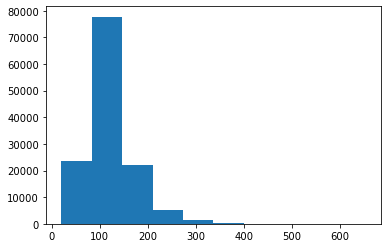

In [36]:
import matplotlib.pyplot as plt
plt.hist(lengths)